In [125]:
import os
import pandas as pd 
import numpy as np
import pickle
import streamlit as st
import json
from tqdm import tqdm
tqdm.pandas(desc="Processing")

os.chdir('c:/Users/Domen/IronHack/01_projects/IH_final_project_data-jobs')
print(os.getcwd())
with open("config/config.json", 'r') as f:
    config = json.load(f)
    
NLP_data_path = config['NLP_data_path']
input_name = "skills_df"


# open and load dataframe
with open(f"{NLP_data_path}{input_name}.pkl", "rb") as f:
    data = pickle.load(f)


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs


In [126]:
display(data.loc[data["city"]==38])

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url


In [127]:
data.head(10)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,keyword,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,Data Analyst,en,"[data_analyst, bi_analyst]",almedia helps companies grow by promoting thei...,1 week ago,2023-09-26,Mid-Senior level,"[SQL, SQL, Python, Excel]",Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,Data Analyst,en,[data_analyst],about the positionwe are looking for a top-tie...,2 months ago,2023-09-24,Mid-Senior level,"[Excel, SQL, Python, Pandas, Matplotlib]",Financial Data Analyst (m/f/d),https://www.linkedin.com/jobs/search?keywords=...
4,"Berlin, Berlin, Germany",Les Lunes,bi_analyst,business intelligence analyst,Full-time,True,3695466781,Retail Apparel and Fashion,Your missionAs a Business Intelligence Analyst...,"Research, Analyst, and Information Technology",...,Data Analyst,en,[bi_analyst],your missionas a business intelligence analyst...,4 weeks ago,2023-09-24,Mid-Senior level,"[Tableau, Power BI, Excel, SQL, Excel]",Business Intelligence Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...
5,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,...,Data Analyst,en,[data_analyst],orange quarter are working with an exciting st...,5 months ago,2023-09-24,Entry level,[E2E],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
6,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,...,Data Analyst,en,[data_analyst],orange quarter are currently looking for a dat...,5 months ago,2023-09-24,Entry level,"[SQL, Python, Snowflake, BigQuery]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
7,"Berlin, Berlin, Germany",Enter,bi_analyst,bi analyst,Full-time,True,3704916810,Architecture and Planning,Build the future with Enter.Our mission is to ...,Information Technology,...,Data Analyst,en,[bi_analyst],build the future with enter.our mission is to ...,3 weeks ago,2023-09-26,Mid-Senior level,"[SQL, Python, Snowflake]",BI Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...
8,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,...,Data Analyst,en,[data_analyst],we are currently working with an emerging saas...,5 months ago,2023-09-24,Entry level,"[E2E, SQL, Python, R ]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
10,"Berlin, Berlin, Germany",kevin.,product data_analyst,product data analyst,Full-time,True,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,...,Data Analyst,en,[data_analyst],kevin. is different. while everyone was talkin...,1 month ago,2023-09-24,Mid-Senior level,"[SQL, Tableau, Power BI, Looker, SAP]",Product Data Analyst,https://www.linkedin.com/jobs/search?keywords=...
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,Data Analyst,de,[data_analyst],positive thinking company ist teil unseres wel...,3 weeks ago,2023-09-26,Entry level,"[Tableau, Power BI, R ]",Data Analyst (m/w/d),ht

In [128]:
data['posting_date'].value_counts(dropna=False)

posting_date
2 weeks ago       314
1 week ago        268
3 weeks ago       263
1 day ago         115
1 month ago        96
4 weeks ago        84
4 days ago         72
5 days ago         66
3 days ago         62
6 days ago         62
3 months ago       38
2 months ago       36
2 days ago         36
5 months ago       26
1 hour ago         23
6 months ago       12
2 hours ago        12
4 months ago       10
23 hours ago        9
19 hours ago        8
17 hours ago        8
4 hours ago         7
21 hours ago        7
3 hours ago         5
16 hours ago        4
6 hours ago         4
22 hours ago        4
5 hours ago         4
20 hours ago        3
15 hours ago        3
11 hours ago        3
10 hours ago        2
9 hours ago         2
49 minutes ago      1
37 minutes ago      1
7 months ago        1
7 hours ago         1
59 minutes ago      1
39 minutes ago      1
14 hours ago        1
12 hours ago        1
29 minutes ago      1
9 minutes ago       1
Just now            1
20 minutes ago     

In [129]:
import pandas as pd
from datetime import datetime, timedelta
from datetime import datetime


In [130]:
def time_to_weeks(row):
    scrap_date = row['scraping_date']
    posting_date = row['posting_date']    
    

    if 'minute' in posting_date or 'hour' in posting_date or 'Just now' in posting_date:
        new_date = posting_date
    if 'day' in posting_date:
        days = int(posting_date.split(' ')[0])
        new_date = scrap_date - timedelta(days=days)
    if 'week' in posting_date:
        weeks = int(posting_date.split(' ')[0])
        new_date = scrap_date - timedelta(weeks=weeks)
    if 'month' in posting_date:
        months = int(posting_date.split(' ')[0])
        new_date = pd.to_datetime(scrap_date) - pd.DateOffset(months=months)
    if 'year' in posting_date:
        years = int(posting_date.split(' ')[0])
        new_date = pd.to_datetime(scrap_date) - pd.DateOffset(years=years)
    
    
    if isinstance(new_date, datetime):    
        row['calc_posting_date'] = new_date.date()
    else:
        row['calc_posting_date'] = new_date
        
        
    return row

In [131]:
data = data.progress_apply(time_to_weeks, axis=1) # add transform posting date to date format


Processing: 100%|██████████| 1687/1687 [00:00<00:00, 2085.42it/s]


In [132]:
display(data.head(10).T)

,1,3,4,5,6,7,8,10,14,17
city,"Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany"
company,Almedia,Ultramarin,Les Lunes,Orange Quarter,Orange Quarter,Enter,Orange Quarter,kevin.,CBTW,Qualitas Energy Deutschland GmbH
cp1_title,data_analyst bi_analyst,financial data_analyst,bi_analyst,data_analyst,data_analyst,bi_analyst,data_analyst,product data_analyst,data_analyst,data_analyst
cp2_title,data analyst business intelligence,financial data analyst,business intelligence analyst,data analyst,data analyst,bi analyst,data analyst,product data analyst,data analyst,data analyst
employment_type,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time
first_match,True,True,True,True,True,True,True,True,True,True
id,3719620327,3672508925,3695466781,3585738180,3585734564,3704916810,3585734595,3687813018,3706371923,3701510210
industries,"Technology, Information and Internet",Financial Services,Retail Apparel and Fashion,Staffing and Recruiting,Staffing and Recruiting,Architecture and Planning,Staffing and Recruiting,Financial Services,IT Services and IT Consulting,Financial Services
job_description,Almedia helps companies grow by promoting thei...,About The PositionWe are looking for a top-tie...,Your missionAs a Business Intelligence Analyst...,Orange Quarter are working with an exciting st...,Orange Quarter are currently looking for a Dat...,Build the future with Enter.Our mission is to ...,We are currently working with an emerging SaaS...,kevin. is different. While everyone was talkin...,Positive Thinking Company ist Teil unseres wel...,Powering Change.Seit mehr als 16 Jahren setzen...
job_function,Analyst,Information Technology,"Research, Analyst, and Information Technology",Information Technology,Information Technology,Information Technology,Information Technology,Information Technology,Consulting,Information Technology


In [133]:
display(data.loc[data["city"]==38])

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url,calc_posting_date


In [134]:
data.fillna("", inplace=True)
data['skills'] = data['skills'].progress_apply(lambda x: list(set(x))) # remove duplicates from skills

Processing: 100%|██████████| 1687/1687 [00:00<00:00, 463834.21it/s]


In [135]:
def remove_duplicates_and_lower(skill_list):
    return list(set([skill.lower() for skill in skill_list]))

In [136]:
# def process_skills(skill_str):
#     skill_list = skill_str.split()  # Trennen Sie den String an Leerzeichen
#     skill_list = [skill.lower() for skill in skill_list]  # Konvertieren Sie in Kleinbuchstaben
#     return list(set(skill_list))

In [137]:
data['skills'] = data['skills'].apply(remove_duplicates_and_lower)

In [138]:

for i in data.index:
    print(f"{i}-{data['skills'][i]}")

1-['excel', 'python', 'sql']
3-['python', ' pandas', 'sql', 'matplotlib', 'excel']
4-['excel', 'tableau', 'sql', 'power bi']
5-['e2e']
6-['bigquery', 'snowflake', 'python', 'sql']
7-['snowflake', 'python', 'sql']
8-[' r ', 'python', 'sql', 'e2e']
10-['looker', 'tableau', 'sql', 'power bi', 'sap']
14-[' r ', 'tableau', 'power bi']
17-['python']
18-['excel', 'oracle', 'sql']
20-['scala', 'tableau', 'python', 'sql']
22-['python', 'sql']
23-['excel', 'sap', 'power bi']
26-['python', 'sql']
27-['aws', 'python', 'gitlab', 'sql', 'snowflake', 'excel']
28-['ad-hoc', 'sql', 'power bi']
29-['python', 'tableau', 'sql', 'power bi', ' r ', 'excel']
31-['python']
34-[]
35-['excel']
38-['tableau', 'sql', 'power bi', 'sap', 'azure']
39-['oracle', 'sql']
50-['excel', 'sql']
51-['excel', 'scala', 'sql']
52-['aws', 'python', ' ml ', ' r ', 'excel']
53-['excel']
57-['excel', 'deep learning', 'python']
62-['nlp', 'scikit', 'python', 'sql']
66-[]
68-['excel']
70-['numpy', 'python', 'looker', ' pandas', 'tab

In [165]:
import pandas as pd

def agg_skill_data(data):
    
    all_skills = []
    for skill_list in data['skills']:
        all_skills.extend(skill_list)
    feature_list = list(set(all_skills))
    
    for skill in feature_list:
        data[skill] = False 
        
    for idx, row in data.iterrows():
        for skill in row['skills']:
            data.at[idx, skill] = True
    
    for index, row in data.iterrows():
        for i, token in enumerate(row['skills']):
            if token.lower() in feature_list:
                row['skills'][i] = token.lower()
        data.at[index, 'skills'] = row['skills']
        
    skill_data = pd.DataFrame(data.skills.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    skill_data = skill_data[skill_data.keywords != '']
    skill_data['percentage'] = round(skill_data['counts'] / len(data) * 100, 1)

    
    return skill_data

filtered_result = agg_skill_data(data)

In [166]:
display(filtered_result)

,keywords,counts,percentage
0,sql,519,30.8
1,python,444,26.3
2,excel,353,20.9
3,sap,267,15.8
4,power bi,194,11.5
5,spark,170,10.1
6,tableau,164,9.7
7,azure,119,7.1
8,aws,107,6.3
9,java,103,6.1


In [152]:
import matplotlib.pyplot as plt

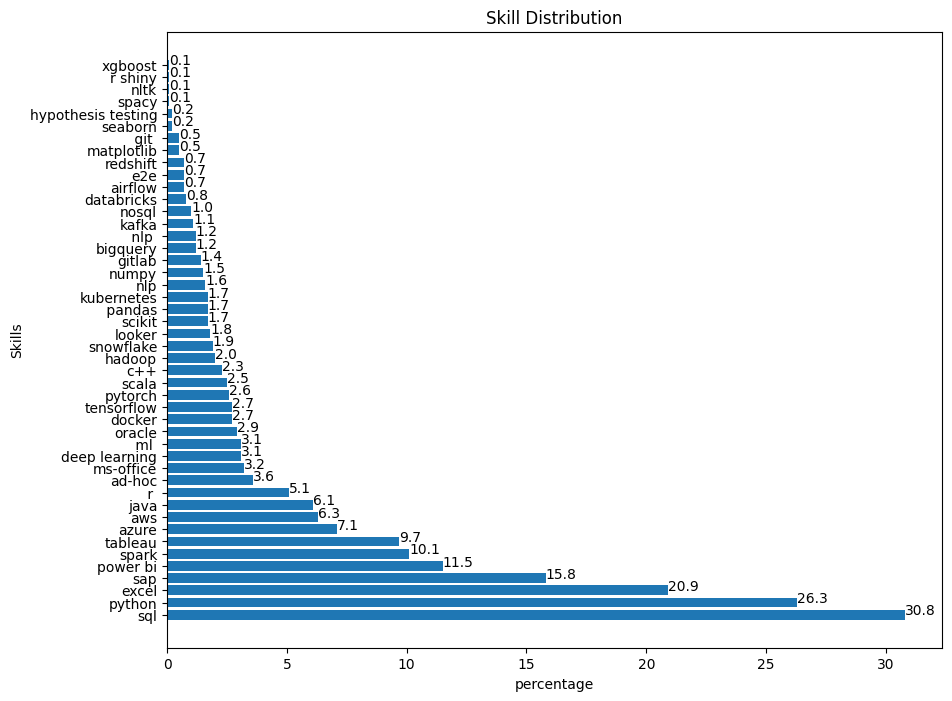

In [167]:
def plot_skill_data(result):
    plt.figure(figsize=(10, 8))
    plt.barh(result['keywords'], result['percentage'])
    plt.xlabel('percentage')
    plt.ylabel('Skills')
    plt.title('Skill Distribution')
    for index, value in enumerate(result['percentage']):
        plt.text(value, index, str(value))
    plt.show()

plot_skill_data(filtered_result)

In [144]:
data.columns

Index(['city', 'company', 'cp1_title', 'cp2_title', 'employment_type',
       'first_match', 'id', 'industries', 'job_description', 'job_function',
       'job_level', 'keyword', 'language', 'new_job_title',
       'nlp_job_description', 'posting_date', 'scraping_date',
       'seniority_level', 'skills', 'title', 'url', 'calc_posting_date',
       'scala', ' nlp ', 'looker', 'bigquery', ' pandas', 'tableau', 'gitlab',
       'power bi', 'e2e', 'c++', 'hypothesis testing', 'spacy', 'nlp',
       'ms-office', 'excel', 'hadoop', 'seaborn', 'kubernetes', 'nltk', 'sap',
       'xgboost', 'redshift', 'ad-hoc', 'kafka', 'spark', 'aws', 'python',
       'java', ' git ', 'nosql', 'sql', 'snowflake', ' ml ', 'airflow',
       'matplotlib', 'pytorch', 'tensorflow', 'deep learning', 'scikit',
       'numpy', 'oracle', 'docker', 'databricks', 'azure', ' r ', 'r shiny'],
      dtype='object')

In [143]:
data.head(40)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,tensorflow,deep learning,scikit,numpy,oracle,docker,databricks,azure,r,r shiny
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,False,False,False,False,False,False,False,False,False,False
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
4,"Berlin, Berlin, Germany",Les Lunes,bi_analyst,business intelligence analyst,Full-time,True,3695466781,Retail Apparel and Fashion,Your missionAs a Business Intelligence Analyst...,"Research, Analyst, and Information Technology",...,False,False,False,False,False,False,False,False,False,False
5,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
6,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
7,"Berlin, Berlin, Germany",Enter,bi_analyst,bi analyst,Full-time,True,3704916810,Architecture and Planning,Build the future with Enter.Our mission is to ...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
8,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,...,False,False,False,False,False,False,False,False,True,False
10,"Berlin, Berlin, Germany",kevin.,product data_analyst,product data analyst,Full-time,True,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,False,False,False,False,False,False,False,False,True,False
17,"Berlin, Berlin, Germany",Qualitas Energy Deutschland GmbH,data_analyst,data analyst,Full-time,True,3701510210,Financial Services,Powering Change.Seit mehr als 16 Jahren setzen...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
